# Machine Learning Techniques Using Breast Cancer Dataset

In [1]:
# Importing libraries and loading dataset

import pandas as pd
import numpy as np
df = pd.read_csv("Datasets/BreastCancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Pre-process the dataset

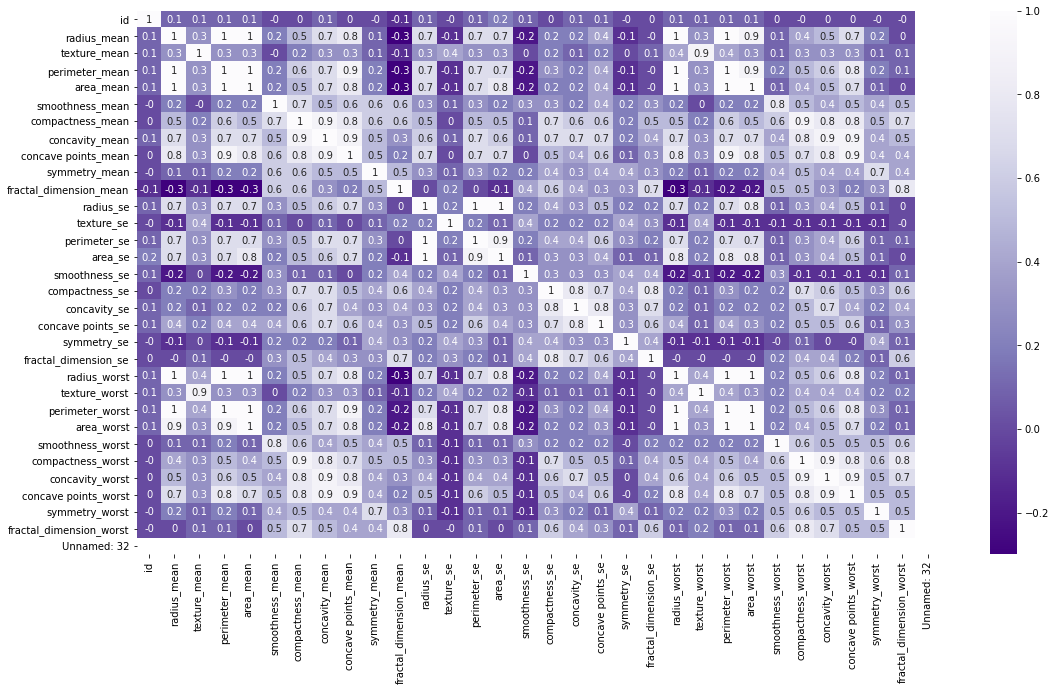

In [2]:
# Analyse and plot the dataset correlation

import matplotlib.pyplot as plt
import seaborn as sns 
corMatrix = df.corr().round(1) # create a correlation matrix and round the values to 1 decimal place
plt.figure(figsize=(18,10)) # Set size for figure
sns.heatmap(corMatrix, cmap='Purples_r', annot=True)  # plot correlation matrix as a heatmap
plt.show()

In [3]:
# From diagnosis, we create a seperate column to represent the data with 1 and 0
diagnosis=pd.get_dummies(df['diagnosis'],drop_first=True)  # drop_first excludes 'B' collumn
df = pd.concat([df,diagnosis], axis=1)  # Add the new diagnosis collumn to the end of the dataset
df.drop(['diagnosis'], axis=1, inplace=True)  # Remove the original diagnosis column

In [4]:
corMatrix = df.corr().round(2)  # recreate correlation matrix and round the values to 2 decimal places
abs(corMatrix['M']).sort_values()  # sort correlation matrix against diagnosis

symmetry_se                0.01
texture_se                 0.01
fractal_dimension_mean     0.01
id                         0.04
smoothness_se              0.07
fractal_dimension_se       0.08
concavity_se               0.25
compactness_se             0.29
fractal_dimension_worst    0.32
symmetry_mean              0.33
smoothness_mean            0.36
concave points_se          0.41
texture_mean               0.42
symmetry_worst             0.42
smoothness_worst           0.42
texture_worst              0.46
area_se                    0.55
perimeter_se               0.56
radius_se                  0.57
compactness_worst          0.59
compactness_mean           0.60
concavity_worst            0.66
concavity_mean             0.70
area_mean                  0.71
radius_mean                0.73
area_worst                 0.73
perimeter_mean             0.74
radius_worst               0.78
concave points_mean        0.78
perimeter_worst            0.78
concave points_worst       0.79
M       

In [5]:
# Removing columns of which hold unneccecary data or correlation is <0.02
df.drop(['id','Unnamed: 32','symmetry_se','texture_se','fractal_dimension_mean'], axis=1, inplace=True) 
#print(df.info())

In [6]:
# Resample class distribution with upscaling
from sklearn.utils import resample
dfMin = df[df.M==1] # minority is the Malignant diagnosis (212)
dfMaj = df[df.M==0] # majority is the Benign diagnosis (357)
dfMinUpsample = resample(dfMin, replace=True, n_samples=len(dfMaj)) # updample the number of malignant cases
df = pd.concat([dfMaj, dfMinUpsample]) # add the new samples to the original dataset
print(df['M'].value_counts())  # print the class distribution

1    357
0    357
Name: M, dtype: int64


In [7]:
# Setting values for X and y
X = df.iloc[:,:-1].values  # set the x values to the first 26 collumns
y = df.iloc[:,-1:].values  # set the y values to the last collumn only
y = y.ravel()
#df.info()

In [8]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)  # split the X and y data

In [9]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Logistic Regression Model

### Without Feature Scaling

In [10]:
# Apply the Logistical regression learning model and train it
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)  # create the training model with increased max_iter
model.fit(X_train,y_train)  # Train the model using our training data

# Get predictions
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)

# Evaluate the model
trainScore="train score = {:0.3f}".format(model.score(X_train, y_train))
testScore="test score = {:0.3f}".format(model.score(X_test, y_test))

### Using Feature Scaling

In [11]:
# Apply the Logistical regression learning model and train it
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)  # set the training model with increased max_iter
model.fit(X_train_scaled,y_train)  # Train the model using our training data

# Get predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(X_train_scaled, y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(X_test_scaled, y_test))

In [12]:
# Model accuracy before and after scaling
print(trainScore)
print(testScore)
print(scaledTrainScore)
print(scaledTestScore)

train score = 0.951
test score = 0.955
Scaled train score = 0.987
Scaled test score = 0.989


### Classification report 

In [13]:
# Evaluate the model 
from sklearn.metrics import classification_report
target_names = ['Malignant','benign']
print(classification_report(y_test,y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

   Malignant       1.00      0.98      0.99        93
      benign       0.98      1.00      0.99        86

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



### Confusion Matricies
cf_matrix library can be found: https://github.com/DTrimarchi10/confusion_matrix.git

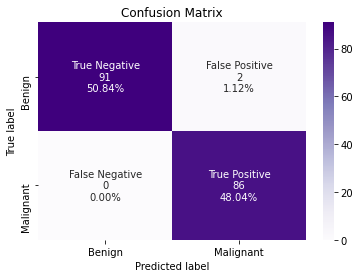

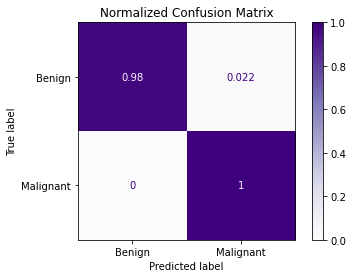

In [14]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)  # Creating a simple confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = ['Benign', 'Malignant']  # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=True,
                      cmap='Purples')

# Plot Normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test_scaled, y_test, 
                             display_labels=['Benign', 'Malignant'],
                             cmap=plt.cm.Purples,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix') 
plt.show()


### Cross Validation

In [15]:
# Use of Cross validation with a second model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Logistic regression model
modelCV = LogisticRegression(max_iter=3000)  

# Use cross_val_score to calculate the accuracy of the model using cross validation
scoreCV = cross_val_score(modelCV, X_scaled, y, cv = 10, scoring='accuracy')
print("CV Model accuracy: ",scoreCV.mean()) # print mean average of the 10 partitianed scores

CV Model accuracy:  0.9817879499217526


### Hyper-Parameter Tuning

#### Random Search

In [16]:
ranModel = LogisticRegression()  # create a new logistic regression model for random search

# create dictionary of parameters for logistic regression
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : [10.0, 1.0, 0.1],
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
     'max_iter' : [500, 800, 1000, 2500]}
]

# Random Grid Seach with 10 fold CV
from sklearn.model_selection import RandomizedSearchCV
ran = RandomizedSearchCV(ranModel, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy', n_iter=10)
ran.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': [10.0, 1.0, 0.1],
                                         'max_iter': [500, 800, 1000, 2500],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'saga',
                                                    'sag']}],
                   scoring='accuracy', verbose=True)

In [17]:
# Accuracy of the random search hyper-parameter tuned model
print (ran.best_params_)
print (ran.best_estimator_)
print ("Best Random Tuned Accuracy: {:.6f}".format(ran.best_score_))

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 2500, 'C': 0.1}
LogisticRegression(C=0.1, max_iter=2500, solver='newton-cg')
Best Random Tuned Accuracy: 0.985974


#### Grid Search

In [ ]:
gridModel = LogisticRegression()   # create a new logistic regression model for grid search

# create dictionary of parameters for logistical regression
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : [10.0, 1.0, 0.1],
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
     'max_iter' : [500, 800, 1000, 2500]}
]

# Grid Seach with 10 fold CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gridModel, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

In [ ]:
# Accuracy of the grid search hyper-parameter tuned model
print (grid.best_params_)
print (grid.best_estimator_)
print ("Best Tuned Accuracy: {:.6f}".format(grid.best_score_))

# Neural Network Model

### Without Feature Scaling

In [ ]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)

# Get predictions
y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test)

# Evaluate the model
trainScore="train score = {:0.3f}".format(model.score(X_train, y_train))
testScore="test score = {:0.3f}".format(model.score(X_test, y_test))

### Using Feature Scaling

In [ ]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(X_train_scaled,y_train)

# Get predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(X_train_scaled, y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(X_test_scaled, y_test))

In [ ]:
# Model accuracy before and after scaling
print(trainScore)
print(testScore)
print(scaledTrainScore)
print(scaledTestScore)

## Classification report

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report
target_names = ['Malignant','benign']
print(classification_report(y_test,y_test_pred, target_names=target_names))

 ## Confusion Matricies

In [ ]:
# Plot Confusion Matricies

from cf_matrix import make_confusion_matrix
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)  # Creating a simple confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = ['Benign', 'Malignant']  # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=True,
                      cmap='Purples')

# Plot Normalized confusion matricies
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                             display_labels=['Benign', 'Malignant'],
                             cmap=plt.cm.Purples,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix') 
plt.show()

## Cross Validation

In [ ]:
# Use of Cross validation with a second model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Neural Netwrok learning model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)

# Use cross_val_score to calculate the accuracy of the model using cross validation
score = cross_val_score(model, X_scaled, y, cv = 10, scoring='accuracy')
print("CV Model accuracy: ",score.mean()) # print mean average of the 10 partitianed scores

## Hyper-Parameter Tuning  

### Random Search 

In [ ]:
ranModel = MLPClassifier()  # create a new neural network model for random search

# create dictionary of parameters for logistical regression
param_grid = [
    {'hidden_layer_sizes': [(200,),(100,),(50,)],
     'activation': ['identity', 'logistic', 'tanh', 'relu'],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'alpha': [0.001, 0.0001],
     'learning_rate': ['constant', 'invscaling', 'adaptive'],}
]

# Random Grid Seach with 10 fold CV
from sklearn.model_selection import RandomizedSearchCV
ran = RandomizedSearchCV(ranModel, param_grid, cv=10, verbose=True, n_jobs=-1, 
                         scoring='accuracy',n_iter=10)
ran.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

In [ ]:
# Accuracy of the random hyper-parameter tuned model
print (ran.best_params_)
print (ran.best_estimator_)
print ("Best Random Tuned Accuracy: {:.6f}".format(ran.best_score_))

 ### Grid Search

In [ ]:
gridModel = MLPClassifier()  # create a new neural network model for grid search

# create dictionary of parameters for Neural Network
param_grid = [
    {'hidden_layer_sizes': [(200,),(100,),(50,)],
     'activation': ['identity', 'logistic', 'tanh', 'relu'],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'alpha': [0.001, 0.05],
     'learning_rate': ['constant', 'invscaling', 'adaptive'],}
]

# Grid Seach with 10 fold CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gridModel, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

In [ ]:
# Accuracy of the grid search hyper-parameter tuned model
print (grid.best_params_)
print (grid.best_estimator_)
print ("Best Tuned Accuracy: {:.6f}".format(grid.best_score_))

# Support Vector Machines Model

### Without Feature Scaling

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)  # Train the model using our training data

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
trainScore="train score = {:0.3f}".format(model.score(X_train, y_train))
testScore="test score = {:0.3f}".format(model.score(X_test, y_test))

### Using Feature Scaling


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled,y_train)  # Train the model using our training data

# Get predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(X_train_scaled, y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(X_test_scaled, y_test))

In [ ]:
# Model accuracy before and after scaling
print(trainScore)
print(testScore)
print(scaledTrainScore)
print(scaledTestScore)

## Classification report

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report
target_names = ['Malignant','benign']
print(classification_report(y_test,y_test_pred, target_names=target_names))

 ## Confusion Matricies

In [ ]:
# Plot Confusion Matricies

from cf_matrix import make_confusion_matrix  # Import library (found: https://github.com/DTrimarchi10/confusion_matrix.git)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)  # Creating a simple confusion matrix
cfm
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = ['Benign', 'Malignant']  # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=True,
                      cmap='Purples')

# Plot Normalized confusion matricies
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                             display_labels=['Benign', 'Malignant'],
                             cmap=plt.cm.Purples,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix') 
plt.show()

## Cross Validation

In [ ]:
# Use of Cross validation with a second model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second SVM model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled,y_train)  # Train the model using our training data

# Use cross_val_score to calculate the accuracy of the model using cross validation
score = cross_val_score(model, X_scaled, y, cv = 10, scoring='accuracy')
print("CV Model accuracy: ",score.mean()) # print mean average of the 10 partitianed scores

## Hyper-Parameter Tuning  


### Random Search 

In [ ]:
ranModel = SVC()  # create a new SVM model for grid search

# create dictionary of parameters for logistical regression
param_grid = [ 
        {'kernel': ['rbf', 'poly', 'sigmoid','linear'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],}
]

# Random Grid Seach with 10 fold CV
from sklearn.model_selection import RandomizedSearchCV
ran = RandomizedSearchCV(ranModel, param_grid, cv=10, verbose=True, n_jobs=-1, 
                         scoring='accuracy',n_iter=10)
ran.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

In [ ]:
# Accuracy of the random hyper-parameter tuned model
print (ran.best_params_)
print (ran.best_estimator_)
print ("Best Random Tuned Accuracy: {:.6f}".format(ran.best_score_))

 ### Grid Search


In [ ]:
gridModel = SVC()    # create a new SVM model for random search

# create dictionary of parameters for logistical regression
param_grid = [ 
        {'kernel': ['rbf', 'poly', 'sigmoid','linear'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],}
]

# Grid Seach with 10 fold CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gridModel, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

In [ ]:
# Accuracy of the grid search hyper-parameter tuned model
print (grid.best_params_)
print (grid.best_estimator_)
print ("Best Tuned Accuracy: {:.6f}".format(grid.best_score_))